## Day 6 Exercise
A. (25 mins) **Genre Classification (Individual)**

   1. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder. 
   Alternatively, you may also use the provided sample playlist data.
    
   2. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   3. Increase the number of features included in the models and repeat Steps 1-7 (but skip code cells for plotting-- viz for >2D will not work). How does this affect the model scores? Find the combination of features that will give you the best accuracy score.
   
   4. CHALLENGE (optional) Modify the notebook to take in any 3 music genres as groupings and repeat Steps 1-7.

B. (10 mins) **Group sharing**

Take turns presenting this notebook with your code answer to the whole group. Be brief and discuss only your best result.

-----

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/).
    
    Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?

*Submit this notebook at the end of class time*

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and check values of 2 playlist sets

In [4]:
#set keyword
KEYWORD1='EDM'

In [5]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head()

playlist_id                          playlist_name  \
0  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   
1  3Di88mvYplBtkDBIzGLiiM                          EDM Hits 2022   
2  37i9dQZF1DXafD1g5rer7q                          EDM Samplings   
3  37i9dQZF1DXdVmhVVRZJ3I                               Suor EDM   
4  37i9dQZF1DX3Kdv0IChEm9                               EDM Hits   

   playlist_total_tracks                   owner_id          owner_name  \
0                    110  21uvjs6vsljej5dzs5ksdwprq  The Book of Wisdom   
1                    119                  fineshark  Christoffer Brants   
2                     50                    spotify             Spotify   
3                     50                    spotify             Spotify   
4                     60                    spotify             Spotify   

   total_followers  
0           493512  
1           361597  
2           306821  
3           258939  
4           142710

In [6]:
playlist1_df.shape

(19, 6)

In [7]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/playlists/'+KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/playlists/'+KEYWORD1+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

track_id       track_name               artist_id  \
0  4uUG5RXrOk84mYEfFvj3cK  I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
1  4uUG5RXrOk84mYEfFvj3cK  I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
2  4uUG5RXrOk84mYEfFvj3cK  I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
3  4uUG5RXrOk84mYEfFvj3cK  I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   
4  4uUG5RXrOk84mYEfFvj3cK  I'm Good (Blue)  1Cs0zKBU1kc0i8ypK3B9ai   

    artist_name                album_id  duration release_date  popularity  \
0  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   2022-08-26          96   
1  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   2022-08-26          96   
2  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   2022-08-26          96   
3  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   2022-08-26          96   
4  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   2022-08-26          96   

   danceability  energy  ...  instrumentalness  liveness  valence   tempo  \
0         0.561   0.965  ...          0.000007     0.371    0.304  128.04   
1         0.561   0.965  ...          0.000007     0.371    0.304  128.04   
2         0.561   0.965  ...          0.000007     0.371    0.304  128.04   
3         0.561   0.965  ...          0.000007     0.371    0.304  128.04   
4         0.561   0.965  ...          0.000007     0.371    0.304  128.04   

            playlist_id_x                        playlist_name_x  \
0  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   
1  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   
2  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   
3  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   
4  3VXReCeetN58c1clj9u8ZK  Tomorrowland 2022 Playlist 💙 EDM HITS   

            playlist_id_y                                    playlist_name_y  \
0  3VXReCeetN58c1clj9u8ZK              Tomorrowland 2022 Playlist 💙 EDM HITS   
1  3Di88mvYplBtkDBIzGLiiM                                      EDM Hits 2022   
2  37i9dQZF1DXafD1g5rer7q                                      EDM Samplings   
3  7m1C1eHUC2kJQL69dGMjaz                           Top EDM Hits of All Time   
4  6FjUyONoZCmdvKPfeWEohP  EDM PARTY 2022 🎉 EDM Dance Party Hits, Slap Ho...   

   duration_mins genre  
0       2.920633   EDM  
1       2.920633   EDM  
2       2.920633   EDM  
3       2.920633   EDM  
4       2.920633   EDM  

[5 rows x 25 columns]

In [8]:
tracks1_df.shape

(4060, 25)

In [9]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

3476

<AxesSubplot:>

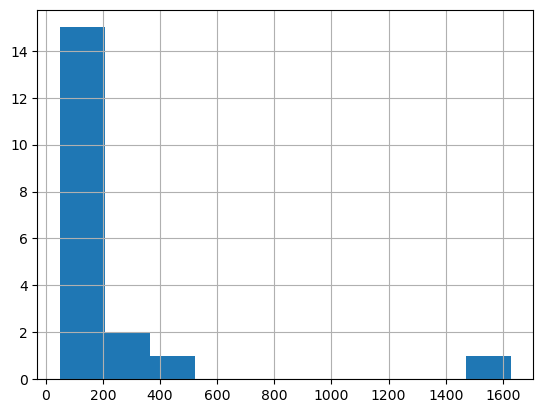

In [10]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [11]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

19

<AxesSubplot:>

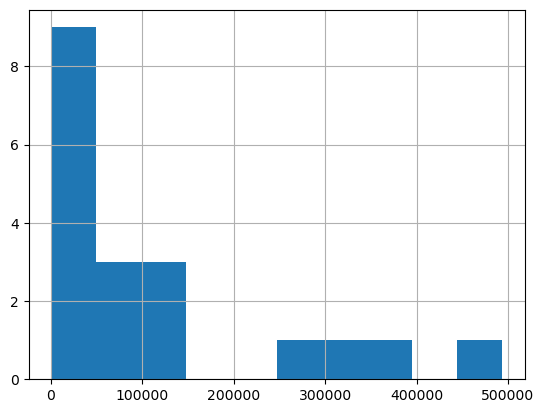

In [12]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [13]:
###################### set keyword
KEYWORD2='classical'

In [14]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

playlist_id                 playlist_name  \
0   37i9dQZF1DWWEJlAGA9gs0          Classical Essentials   
1   37i9dQZF1DWV0gynK7G6pD        Classical New Releases   
2   37i9dQZF1DX9G9wwzwWL2k                Epic Classical   
3   37i9dQZF1DWUvHZA1zLcjW             Chilled Classical   
4   37i9dQZF1DX8Sz1gsYZdwj               Classical Sleep   
5   37i9dQZF1DWUPafHP1BJw1            Pop Goes Classical   
6   37i9dQZF1DX4s3V2rTswzO             Classical Romance   
7   37i9dQZF1DX0Aaer4Jzfgm                Easy Classical   
8   1ZJpJahEFst7u8njXeGFyv            Relaxing Classical   
9   37i9dQZF1DX9OZisIoJQhG             Morning Classical   
10  37i9dQZF1DX6K3W8KBiALe   Classical Moments in Movies   
11  1h0CEZCm6IbFTbxThn6Xcs          Best Classical Music   
12  37i9dQZF1DWVFeEut75IAL             Calming Classical   
13  37i9dQZF1DX7cBprxbt1Fn              Gentle Classical   
14  37i9dQZF1DX2mmt7R81K2b          Jazz Meets Classical   
15  37i9dQZF1DX17GkScaAekA       Dark Academia Classical   
16  6wObnEPQ63a4kei1sEcMdH  Classical Music For Studying   
17  37i9dQZF1DXd5zUwdn6lPb               Classical Focus   
18  37i9dQZF1DX4P0ijJK5lUv           Classical Christmas   
19  37i9dQZF1DWYkztttC1w38             Classical Reading   

    playlist_total_tracks          owner_id  \
0                     148           spotify   
1                      46           spotify   
2                      66           spotify   
3                      90           spotify   
4                      53           spotify   
5                     100           spotify   
6                      40           spotify   
7                      50           spotify   
8                      80       sonymusicuk   
9                      41           spotify   
10                     71           spotify   
11                    122  peacefulclassics   
12                     64           spotify   
13                     67           spotify   
14                     51           spotify   
15                     46           spotify   
16                    279  klassieke_muziek   
17                    100           spotify   
18                    119           spotify   
19                     68           spotify   

                           owner_name  total_followers  
0                             Spotify          2573405  
1                             Spotify           621261  
2                             Spotify           483342  
3                             Spotify           432616  
4                             Spotify           407129  
5                             Spotify           382766  
6                             Spotify           374025  
7                             Spotify           356237  
8                            Filtr UK           322217  
9                             Spotify           321239  
10                            Spotify           297941  
11                  Peaceful Classics           291967  
12                            Spotify           280036  
13                            Spotify           254133  
14                            Spotify           246914  
15                            Spotify           236294  
16  Klassieke Muziek by Maestro Music           219734  
17                            Spotify           208732  
18                            Spotify           204460  
19                            Spotify           200153

In [15]:
playlist2_df.shape

(96, 6)

In [16]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

Unnamed: 0                track_id  \
0           0  4SFBV7SRNG2e2kyL1F6kjU   
1           1  1upQiytDIEZfl9ItruoXuC   
2           1  1upQiytDIEZfl9ItruoXuC   
3           1  1upQiytDIEZfl9ItruoXuC   
4           2  1upQiytDIEZfl9ItruoXuC   

                                          track_name               artist_id  \
0  The Well-Tempered Clavier: Book 1, BWV 846-869...  5aIqB5nVVvmFsvSdExz408   
1  Handel / Orch. Hale: Keyboard Suite No. 4 in D...  1QL7yTHrdahRMpvNtn6rI2   
2  Handel / Orch. Hale: Keyboard Suite No. 4 in D...  1QL7yTHrdahRMpvNtn6rI2   
3  Handel / Orch. Hale: Keyboard Suite No. 4 in D...  1QL7yTHrdahRMpvNtn6rI2   
4  Handel / Orch. Hale: Keyboard Suite No. 4 in D...  1QL7yTHrdahRMpvNtn6rI2   

              artist_name                album_id  duration release_date  \
0   Johann Sebastian Bach  1XORY4rQNhqkZxTze6Px90    139306   2019-03-29   
1  George Frideric Handel  657D9POYWMrDMK9MWNxPHL    207266         2002   
2  George Frideric Handel  657D9POYWMrDMK9MWNxPHL    207266         2002   
3  George Frideric Handel  657D9POYWMrDMK9MWNxPHL    207266         2002   
4  George Frideric Handel  657D9POYWMrDMK9MWNxPHL    207266         2002   

   popularity  danceability  ...  instrumentalness  liveness  valence  \
0          63        0.2210  ...             0.897    0.1020   0.2160   
1          66        0.0939  ...             0.830    0.0954   0.0516   
2          66        0.0939  ...             0.830    0.0954   0.0516   
3          66        0.0939  ...             0.830    0.0954   0.0516   
4          66        0.0939  ...             0.830    0.0954   0.0516   

     tempo           playlist_id_x       playlist_name_x  \
0  133.630  37i9dQZF1DWWEJlAGA9gs0  Classical Essentials   
1   67.359  37i9dQZF1DWWEJlAGA9gs0  Classical Essentials   
2   67.359  37i9dQZF1DWWEJlAGA9gs0  Classical Essentials   
3   67.359  37i9dQZF1DWWEJlAGA9gs0  Classical Essentials   
4   67.359  37i9dQZF1DX0Aaer4Jzfgm        Easy Classical   

            playlist_id_y          playlist_name_y  duration_mins      genre  
0  37i9dQZF1DWWEJlAGA9gs0     Classical Essentials       2.321767  classical  
1  37i9dQZF1DWWEJlAGA9gs0     Classical Essentials       3.454433  classical  
2  37i9dQZF1DX0Aaer4Jzfgm           Easy Classical       3.454433  classical  
3  37i9dQZF1DX17GkScaAekA  Dark Academia Classical       3.454433  classical  
4  37i9dQZF1DWWEJlAGA9gs0     Classical Essentials       3.454433  classical  

[5 rows x 26 columns]

In [17]:
tracks2_df.shape

(2161, 26)

In [18]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1536

In [19]:
#set keyword
KEYWORD3='pop'

In [20]:
# read and process the playlist data for keyword
playlist3_df = pd.read_csv('data/playlists/'+KEYWORD2+'_playlist_data.csv')
playlist3_df.head(20)

playlist_id                 playlist_name  \
0   37i9dQZF1DWWEJlAGA9gs0          Classical Essentials   
1   37i9dQZF1DWV0gynK7G6pD        Classical New Releases   
2   37i9dQZF1DX9G9wwzwWL2k                Epic Classical   
3   37i9dQZF1DWUvHZA1zLcjW             Chilled Classical   
4   37i9dQZF1DX8Sz1gsYZdwj               Classical Sleep   
5   37i9dQZF1DWUPafHP1BJw1            Pop Goes Classical   
6   37i9dQZF1DX4s3V2rTswzO             Classical Romance   
7   37i9dQZF1DX0Aaer4Jzfgm                Easy Classical   
8   1ZJpJahEFst7u8njXeGFyv            Relaxing Classical   
9   37i9dQZF1DX9OZisIoJQhG             Morning Classical   
10  37i9dQZF1DX6K3W8KBiALe   Classical Moments in Movies   
11  1h0CEZCm6IbFTbxThn6Xcs          Best Classical Music   
12  37i9dQZF1DWVFeEut75IAL             Calming Classical   
13  37i9dQZF1DX7cBprxbt1Fn              Gentle Classical   
14  37i9dQZF1DX2mmt7R81K2b          Jazz Meets Classical   
15  37i9dQZF1DX17GkScaAekA       Dark Academia Classical   
16  6wObnEPQ63a4kei1sEcMdH  Classical Music For Studying   
17  37i9dQZF1DXd5zUwdn6lPb               Classical Focus   
18  37i9dQZF1DX4P0ijJK5lUv           Classical Christmas   
19  37i9dQZF1DWYkztttC1w38             Classical Reading   

    playlist_total_tracks          owner_id  \
0                     148           spotify   
1                      46           spotify   
2                      66           spotify   
3                      90           spotify   
4                      53           spotify   
5                     100           spotify   
6                      40           spotify   
7                      50           spotify   
8                      80       sonymusicuk   
9                      41           spotify   
10                     71           spotify   
11                    122  peacefulclassics   
12                     64           spotify   
13                     67           spotify   
14                     51           spotify   
15                     46           spotify   
16                    279  klassieke_muziek   
17                    100           spotify   
18                    119           spotify   
19                     68           spotify   

                           owner_name  total_followers  
0                             Spotify          2573405  
1                             Spotify           621261  
2                             Spotify           483342  
3                             Spotify           432616  
4                             Spotify           407129  
5                             Spotify           382766  
6                             Spotify           374025  
7                             Spotify           356237  
8                            Filtr UK           322217  
9                             Spotify           321239  
10                            Spotify           297941  
11                  Peaceful Classics           291967  
12                            Spotify           280036  
13                            Spotify           254133  
14                            Spotify           246914  
15                            Spotify           236294  
16  Klassieke Muziek by Maestro Music           219734  
17                            Spotify           208732  
18                            Spotify           204460  
19                            Spotify           200153

In [21]:
playlist3_df.shape

(96, 6)

In [28]:
# read and process the playlist data for keyword
tracks3_df = pd.read_csv('data/playlists/'+KEYWORD3+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/playlists/'+KEYWORD3+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks3_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks3_df['genre']=KEYWORD3
tracks3_df.head()

Unnamed: 0                track_id            track_name  \
0           0  0lx2cLdOt3piJbcaXIV74f                willow   
1           1  0fioLzGM8ngbD1w6fMmm45  I'm Not The Only One   
2           2  3U4isOIWM3VvDubwSI3y7a             All of Me   
3           3  0gplL1WMoJ6iYaPgMCL0gX            Easy On Me   
4           4  22eqegdVyWgAQAwLkm7L9b             September   

                artist_id   artist_name                album_id  duration  \
0  06HL4z0CvFAxyc27GXpf02  Taylor Swift  2Xoteh7uEpea4TohMxjtaq    214706   
1  2wY79sveU1sp5g7SokKOiI     Sam Smith  2Jg7JZ0ZXOGje1bkq7CVgK    239316   
2  5y2Xq6xcjJb2jVM54GHK3t   John Legend  4OTAx9un4e6NfoHuVRiOrC    269560   
3  4dpARuHxo51G3z768sgnrY         Adele  224jZ4sUX7OhAuMwaxp86S    224694   
4  4IWBUUAFIplrNtaOHcJPRM  James Arthur  6omZGefN53iRMtrJjCWTBg    220891   

  release_date  popularity  danceability  ...  instrumentalness  liveness  \
0   2020-12-11          81         0.392  ...          0.001790    0.1450   
1   2014-01-01           0         0.453  ...          0.000027    0.0772   
2   2013-08-30          86         0.422  ...          0.000000    0.1320   
3   2021-10-14          97         0.604  ...          0.000000    0.1330   
4   2021-06-10          66         0.641  ...          0.000000    0.1200   

   valence    tempo           playlist_id_x  playlist_name_x  \
0    0.529   81.112  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits   
1    0.501   80.994  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits   
2    0.331  119.930  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits   
3    0.130  141.981  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits   
4    0.417  102.912  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits   

            playlist_id_y  playlist_name_y  duration_mins  genre  
0  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits       2.321767    pop  
1  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits       3.454433    pop  
2  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits       3.454433    pop  
3  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits       3.454433    pop  
4  37i9dQZF1DWTwnEm1IYyoj    Soft Pop Hits       3.454433    pop  

[5 rows x 26 columns]

In [29]:
tracks3_df.shape

(1843, 26)

In [30]:
# How many unique tracks are in playlist 2?
len(tracks3_df['track_id'].unique())

1528

## 2. Compare histograms of 2 playlist sets

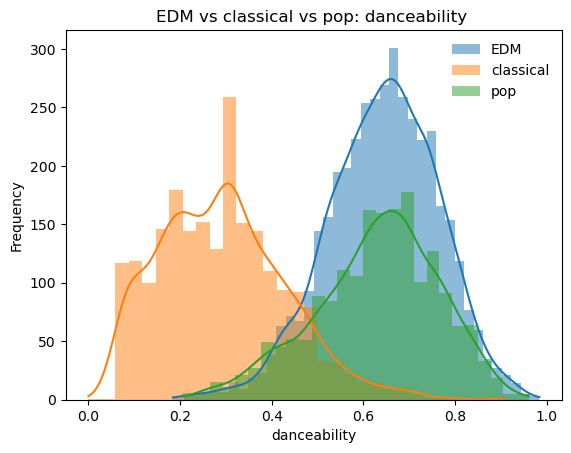

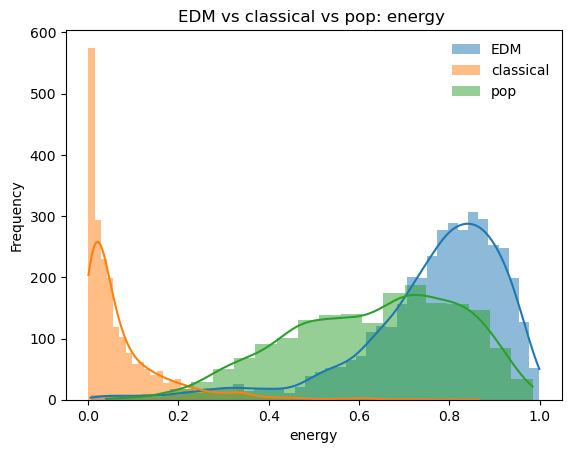

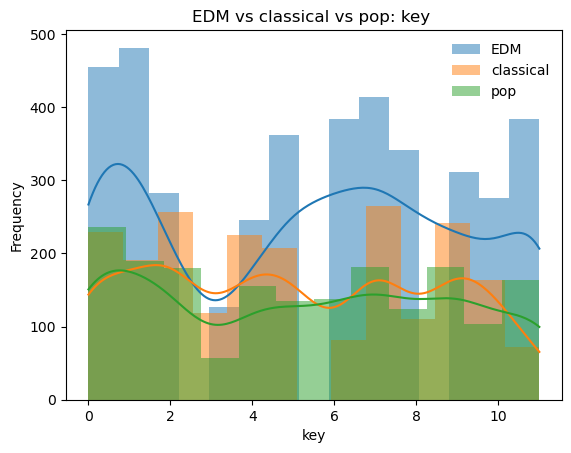

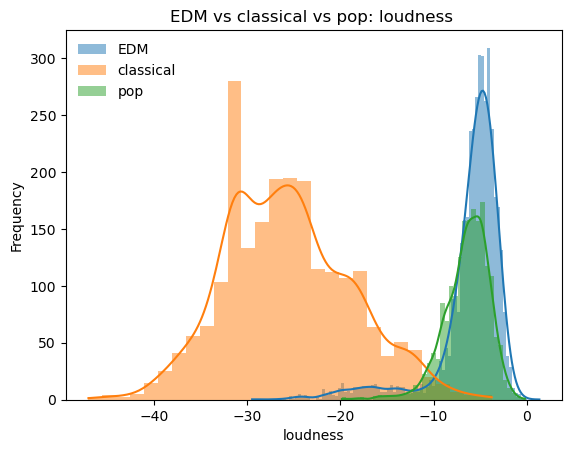

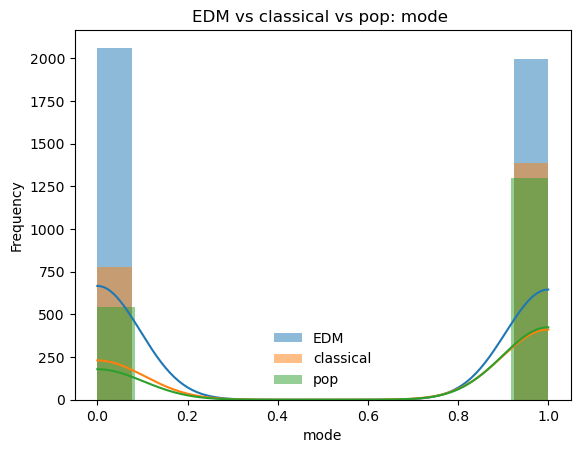

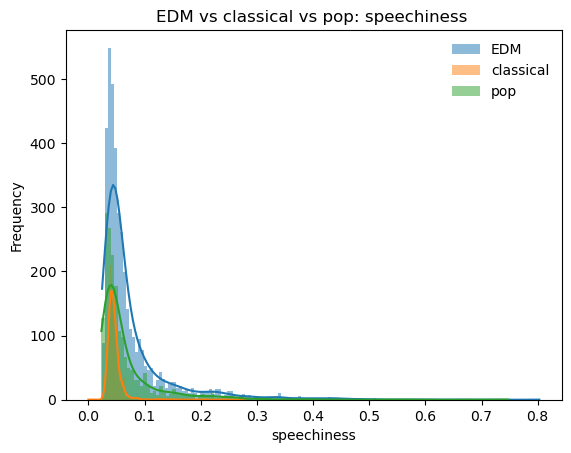

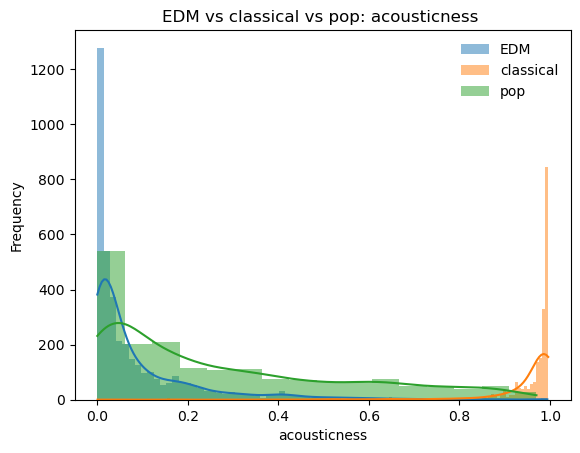

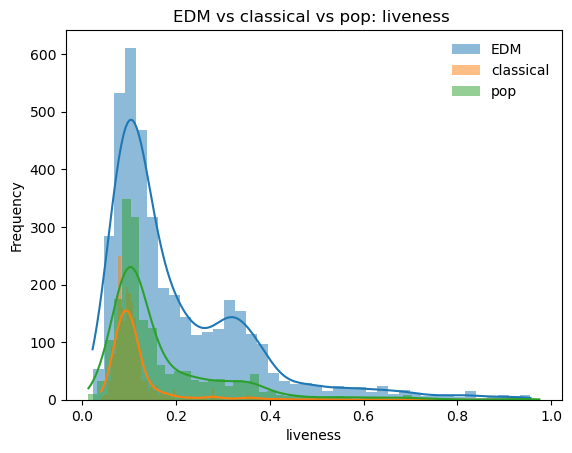

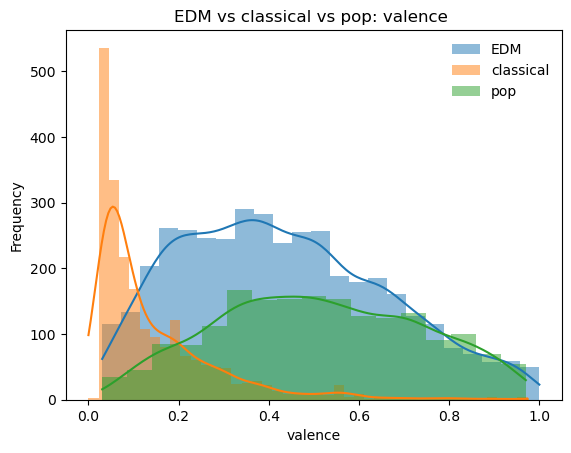

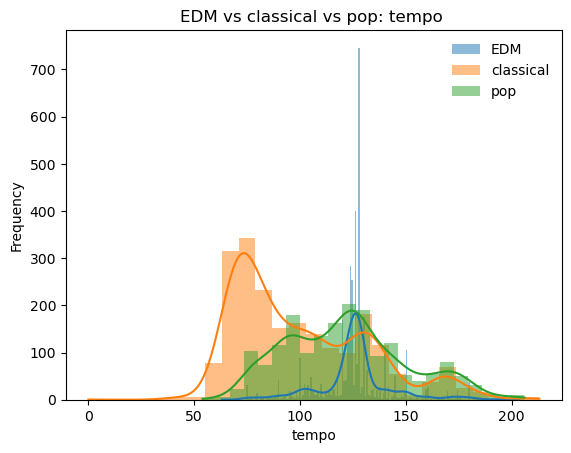

In [25]:
for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo']:
    fig,ax = plt.subplots()
    
    sns.histplot(tracks1_df[col], ax=ax, label= KEYWORD1, kde=True, color='C0', edgecolor='None')
    sns.histplot(tracks2_df[col], ax=ax, label= KEYWORD2,  kde=True, color='C1', edgecolor='None')
    sns.histplot(tracks3_df[col], ax=ax, label= KEYWORD3,  kde=True, color='C2', edgecolor='None')
    plt.title("%s vs %s vs %s: %s " % (KEYWORD1,KEYWORD2,KEYWORD3,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #RobustScaler would also work

In [32]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df,tracks3_df])
tracks1_df.shape, tracks2_df.shape, tracks3_df.shape, tracks_df.shape

((4060, 25), (2161, 26), (1843, 26), (8064, 26))

In [33]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(6497, 26)

In [34]:
#Normalize loudness
tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


count    6497.000000
mean        0.751703
std         0.186320
min         0.000000
25%         0.663305
50%         0.839774
75%         0.875920
max         1.000000
Name: loudness, dtype: float64

In [35]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    6497.000000
mean        0.560751
std         0.124031
min         0.000000
25%         0.478734
50%         0.582607
75%         0.610155
max         1.000000
Name: tempo, dtype: float64

In [36]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2,KEYWORD3:3})

## 4. Preview possible classification results

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


In [37]:
feature_cols = ['energy', 'acousticness']

<AxesSubplot:xlabel='energy', ylabel='acousticness'>

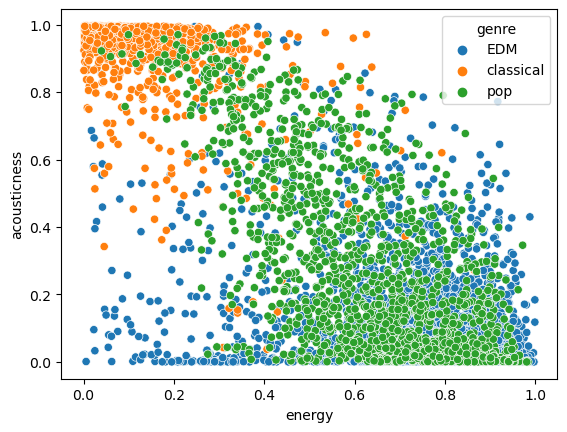

In [38]:
sns.scatterplot(data=tracks_df, x=feature_cols[0], y=feature_cols[1], hue='genre')

<AxesSubplot:xlabel='energy', ylabel='acousticness'>

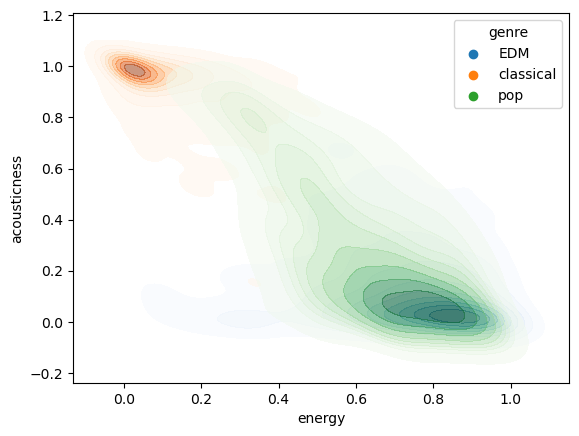

In [41]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Blues','Oranges', 'Greens']
for n,genre in enumerate([KEYWORD1,KEYWORD2,KEYWORD3]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(x=df[feature_cols[0]],y=df[feature_cols[1]], ax=ax,\
                shade=True, alpha=0.5, cmap=colormaps[n])

#hack for proper legend render
sns.scatterplot(data=tracks_df, x=feature_cols[0], y=feature_cols[1], hue='genre', s=0)

> Q: How would you interpret the resulting scatterplot/distribution?

In [42]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    plot_confusion_matrix, plot_roc_curve


## 5. Model Tuning: kNN

Select audio features to use for the model

In [43]:
# create feature matrix (X)
# pick energy and tempo as features

X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

6497 6497


In [44]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=4 ...DONE!
Fitting KNN with K=5 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=6 ...DONE!
Fitting KNN with K=7 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=8 ...DONE!
Fitting KNN with K=9 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=10 ...DONE!
Fitting KNN with K=11 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=12 ...DONE!
Fitting KNN with K=13 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=14 ...DONE!
Fitting KNN with K=15 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=16 ...DONE!
Fitting KNN with K=17 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=18 ...DONE!
Fitting KNN with K=19 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=20 ...DONE!
Fitting KNN with K=21 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=22 ...DONE!
Fitting KNN with K=23 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=24 ...DONE!
Fitting KNN with K=25 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=26 ...DONE!
Fitting KNN with K=27 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=34 ...DONE!
Fitting KNN with K=35 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=36 ...DONE!
Fitting KNN with K=37 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=38 ...DONE!
Fitting KNN with K=39 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=40 ...DONE!
Fitting KNN with K=41 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=42 ...DONE!
Fitting KNN with K=43 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=44 ...DONE!
Fitting KNN with K=45 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


DONE!
Fitting KNN with K=46 ...DONE!
Fitting KNN with K=47 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=48 ...DONE!
Fitting KNN with K=49 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=50 ...DONE!


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Choose optimal value of K

The optimal number of neighbors is 50.00 with accuracy 0.77


Text(0, 0.5, 'Accuracy standard deviation')

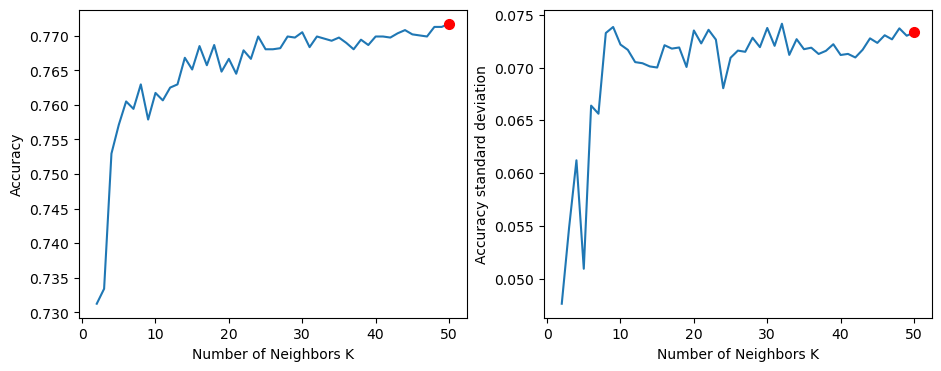

In [45]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.2f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")


Try out optimal model with entire length of the dataset

In [46]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K )
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)

KNeighborsClassifier(n_neighbors=50)

Create a classification report

In [47]:
# predict the response
pred = knn_optimal_model.predict(X)
# evaluate accuracy
acc = accuracy_score(y, pred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 50 is 80.298599%


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 6. Model Tuning: SVM

In [48]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model, show_points=True):
    fig,ax=plt.subplots()
    
    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    if show_points:
        ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

In [49]:
# create feature matrix (X)
feature_cols = ['energy', 'acousticness']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit a **linear** kernel

In [50]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")


In [51]:
#Linear model
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 76.973909% (vs. overall mean score: 76.899940 )
Std of best model score across folds is 0.035470 (vs. overall mean std: 0.044380 )
The accuracy of the SVM classifier for the full dataset is 78.159150%
DONE!


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


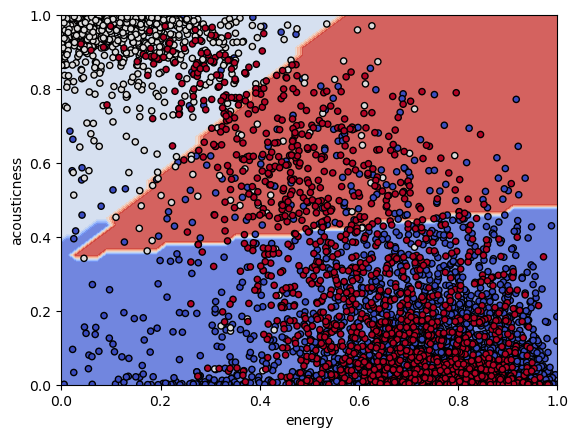

In [52]:
#plot bounds
#error: plot vector bounds only works w 2 input features
plot_vector_bounds(X,svm_model1)

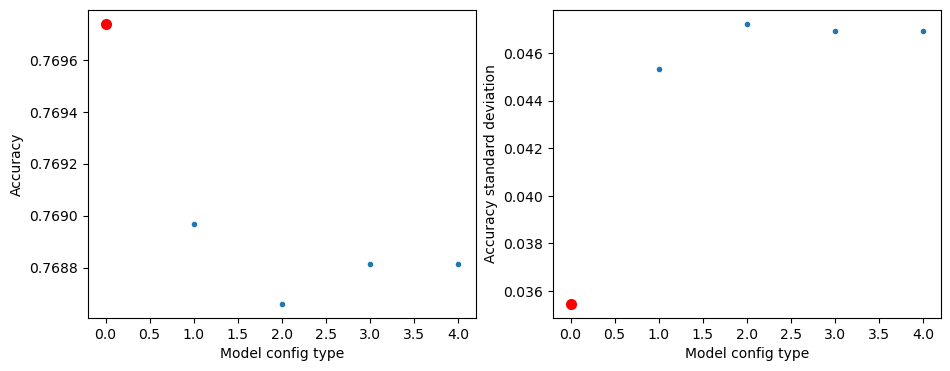

In [53]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **polynomial** kernel

In [ ]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': np.arange(2,6),
              'kernel': ['poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
#plot bounds
#error: plot vector bounds only works w 2 input features
plot_vector_bounds_bounds(X,svm_model2)

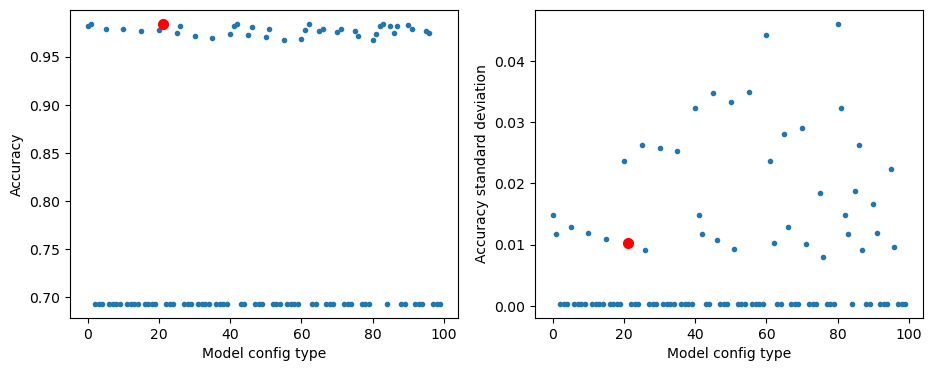

In [55]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **radial** kernel

In [56]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=0.1, gamma=0.01)
Best model config score is 98.563332% (vs. overall mean score: 94.688627 )
Std of best model score across folds is 0.013995 (vs. overall mean std: 0.017069 )
The accuracy of the SVM classifier for the full dataset is 98.663208%
DONE!


In [ ]:
#plot bounds
plot_vector_bounds(X,svm_model3)

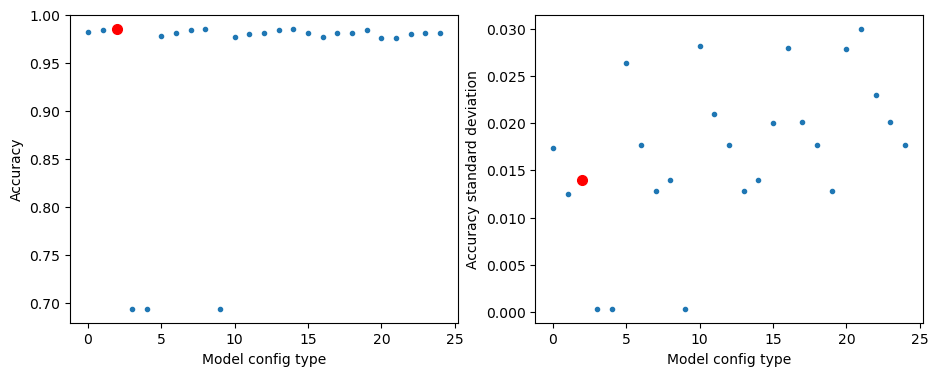

In [57]:
plot_scores(cv_scores_mean,cv_scores_std)

Select best SVM model

In [58]:
svm_optimal_model = svm_model2
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)

SVC(C=1, degree=2, gamma=0.1, kernel='poly', probability=True)

## 7. Model Selection

>Q: Which between KNN and SVM performed better? 

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


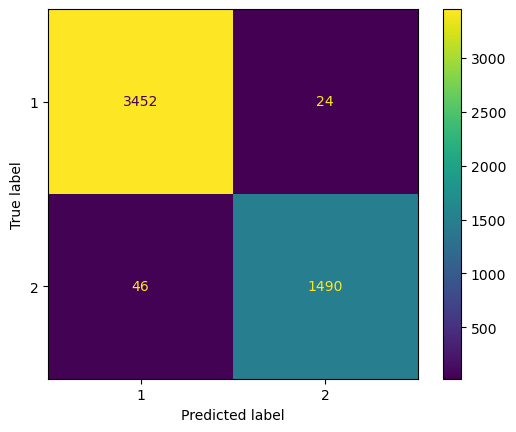

In [59]:
plot_confusion_matrix(svm_optimal_model,X,y)

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


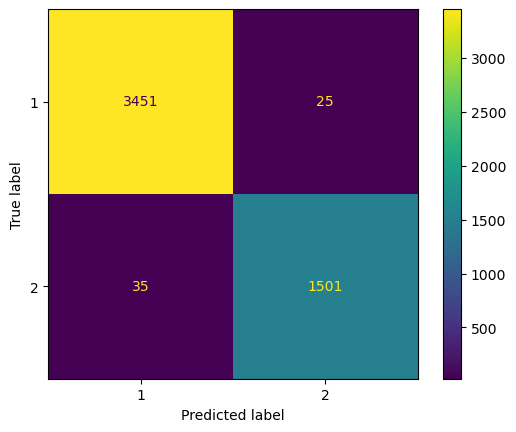

In [60]:
plot_confusion_matrix(knn_optimal_model,X,y)

In [61]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_optimal_model.predict(X)))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_optimal_model.predict(X)))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3476
           2       0.98      0.98      0.98      1536

    accuracy                           0.99      5012
   macro avg       0.99      0.99      0.99      5012
weighted avg       0.99      0.99      0.99      5012

-------------------------------------------------------------
SVM


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3476
           2       0.98      0.97      0.98      1536

    accuracy                           0.99      5012
   macro avg       0.99      0.98      0.98      5012
weighted avg       0.99      0.99      0.99      5012



- accuracy = % correct genre classifications
        all correct / all
- precision =  % correct genre classifications given everything model classified as that genre, emphasizes false positives
        TP/TP+FP 
- recall = % correct genre classifications given all actual tracks in the genre, emphasizes false negatives
        TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


In [62]:
#helper function
def plot_ROC(model,X,y):
    fig, ax = plt.subplots(figsize=(4,4))
    plot_roc_curve(model,X,y, ax=ax)
    #y=x line
    ax.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #edit verbose legend
    default_legend = ax.get_legend_handles_labels()[1][0]
    ax.legend(labels=[default_legend.split(' (')[-1][:-1]],loc='lower right')


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


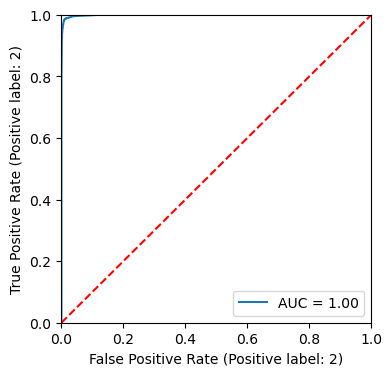

In [63]:
plot_ROC(knn_optimal_model,X,y)

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


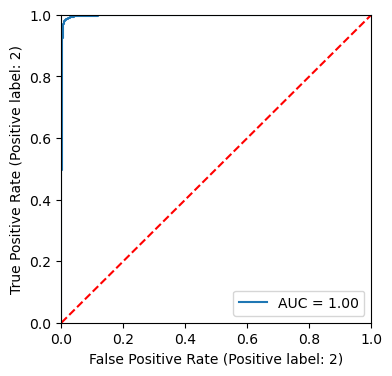

In [64]:
plot_ROC(svm_optimal_model,X,y)

Choose optimal model among those above

In [68]:
optimal_model = knn_optimal_model

## 8. Verifying results using in-sample and out-of-sample predictions

**In-sample**

Check if predicted genres match the genre orinally tagged acc to the spotify playlist name. Focus on misclassified tracks with higher prediction probability to identify possible model improvements

In [69]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
tracks_df['predicted_genre'] = tracks_df['predicted_genre_id'].map({1:KEYWORD1,2:KEYWORD2})
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df.head()

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

track_id                              track_name  \
0   4uUG5RXrOk84mYEfFvj3cK                         I'm Good (Blue)   
5   2prnn41CblB8B4yWACDljP  Love Tonight - David Guetta Remix Edit   
10  6GomT970rCOkKAyyrwJeZi                          Move Your Body   
14  6ho0GyrWZN3mhi9zVRW7xi                               Losing It   
17  20on25jryn53hWghthWWW3                             Do It To It   

                 artist_id   artist_name                album_id  duration  \
0   1Cs0zKBU1kc0i8ypK3B9ai  David Guetta  7M842DMhYVALrXsw3ty7B3    175238   
5   2TcGJdSOiOvITBzhvfX8XB        Shouse  2HYufzr6XUqSurRZdY0D9w    158095   
10  37czgDRfGMvgRiUKHvnnhj       Öwnboss  4l9wMVL4XAM5jPMXP5RAbL    157444   
14  1VJ0briNOlXRtJUAzoUJdt        FISHER  143cxYCazoiNfviHRmxkdv    248035   
17  4pnp4w9g30yLfVIAFnZMRd        ACRAZE  58cd90Jkrovggh556JPN9L    157890   

   release_date  popularity  danceability  energy  ...  \
0    2022-08-26          96         0.561   0.965  ...   
5    2021-06-11          81         0.621   0.989  ...   
10   2021-10-29          83         0.848   0.821  ...   
14   2018-07-13          76         0.760   0.964  ...   
17   2021-08-20          85         0.854   0.806  ...   

                          playlist_name_x           playlist_id_y  \
0   Tomorrowland 2022 Playlist 💙 EDM HITS  3VXReCeetN58c1clj9u8ZK   
5   Tomorrowland 2022 Playlist 💙 EDM HITS  3VXReCeetN58c1clj9u8ZK   
10  Tomorrowland 2022 Playlist 💙 EDM HITS  3VXReCeetN58c1clj9u8ZK   
14  Tomorrowland 2022 Playlist 💙 EDM HITS  3VXReCeetN58c1clj9u8ZK   
17  Tomorrowland 2022 Playlist 💙 EDM HITS  3VXReCeetN58c1clj9u8ZK   

                          playlist_name_y  duration_mins  genre  Unnamed: 0  \
0   Tomorrowland 2022 Playlist 💙 EDM HITS       2.920633    EDM         NaN   
5   Tomorrowland 2022 Playlist 💙 EDM HITS       2.634917    EDM         NaN   
10  Tomorrowland 2022 Playlist 💙 EDM HITS       2.624067    EDM         NaN   
14  Tomorrowland 2022 Playlist 💙 EDM HITS       4.133917    EDM         NaN   
17  Tomorrowland 2022 Playlist 💙 EDM HITS       2.631500    EDM         NaN   

    genre_id  predicted_genre_id  predicted_genre predicted_genre_prob  
0          1                   1              EDM                  1.0  
5          1                   1              EDM                  1.0  
10         1                   1              EDM                  1.0  
14         1                   1              EDM                  1.0  
17         1                   1              EDM                  1.0  

[5 rows x 30 columns]

<AxesSubplot:>

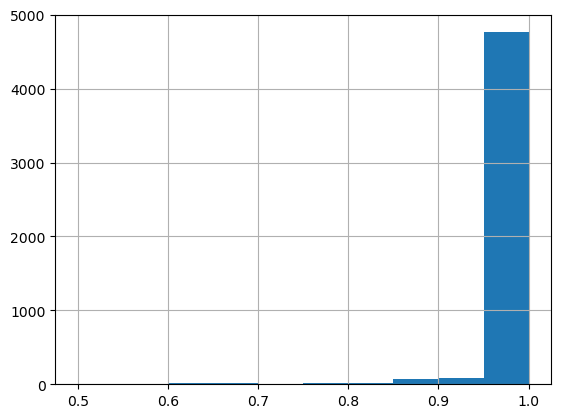

In [70]:
#View histogram of probabilities
tracks_df['predicted_genre_prob'].hist()

Check tracks mistakenly classified with but high probability

In [71]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]\
        .sort_values('predicted_genre_prob', ascending=False)[['track_name','artist_name','genre','predicted_genre','predicted_genre_prob']]

track_name  \
895                                             P.I.M.P   
935                                       Lose Yourself   
3919                                    Melodi me fyell   
3920                                    Melodi bujqsore   
3922                                      Krush e madhe   
937                                 A Sky Full of Stars   
886                         Remind U (feat. TOKiMONSTA)   
3818                            Oldschool Piano Gangsta   
923                                   Moves Like Jagger   
929                                   Take Me to Church   
950                                           Telephone   
856                                             Bad Guy   
949                                               Hello   
3794                                             Habibi   
934                                        Chasing Cars   
859                                            Señorita   
3924                                         Cul dyjare   
3914                              Qiqavices ne ato male   
943                                         Better Days   
1412  The Nutcracker, Op. 71, TH.14 / Act 2: No. 12d...   

                   artist_name      genre predicted_genre  \
895                 Power-Haus  classical             EDM   
935              David Garrett  classical             EDM   
3919                    Moreas        EDM       classical   
3920                    Moreas        EDM       classical   
3922                    Moreas        EDM       classical   
937             The Piano Guys  classical             EDM   
886            Attacca Quartet  classical             EDM   
3818                  Matinees        EDM       classical   
923                TwoPlusFour  classical             EDM   
929               Simply Three  classical             EDM   
950                      Aston  classical             EDM   
856                    Eklipse  classical             EDM   
949                Lucky Chops  classical             EDM   
3794                    DRAMIN        EDM       classical   
934               Simply Three  classical             EDM   
859               Simply Three  classical             EDM   
3924                    Moreas        EDM       classical   
3914                    Moreas        EDM       classical   
943      Dallas String Quartet  classical             EDM   
1412  Pyotr Ilyich Tchaikovsky  classical             EDM   

      predicted_genre_prob  
895               0.979167  
935               0.979167  
3919              0.979167  
3920              0.979167  
3922              0.979167  
937               0.979167  
886               0.979167  
3818              0.979167  
923               0.979167  
929               0.979167  
950               0.958333  
856               0.958333  
949               0.937500  
3794              0.937500  
934               0.937500  
859               0.937500  
3924              0.937500  
3914              0.937500  
943               0.916667  
1412              0.916667

**Out-of-sample**

Check if best model correctly predicts the genre of a track in the Top 200 charts (assuming most are not in the playlist data). User may validate the results subjectively as a listener, or refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

In [72]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df = chart_tracks_df.dropna()
chart_tracks_df.head()

track_id            track_name               artist_id  \
0  0kN8xEmgMW9mh7UmDYHlJP  Versace on the Floor  0du5cEVh5yTK9QJze8zA0C   
1  5uCax9HTNlzGybIStD3vDh  Say You Won't Let Go  4IWBUUAFIplrNtaOHcJPRM   
2  7BKLCZ1jbUBVqRi2FVlTVw                Closer  69GGBxA162lTqCwzJG5jLp   
3  2rizacJSyD9S1IQUxUxnsK           All We Know  69GGBxA162lTqCwzJG5jLp   
4  5MFzQMkrl1FOOng9tq6R9r      Don't Wanna Know  04gDigrS5kc9YWfZHwBETP   

        artist_name                album_id  duration release_date  \
0        Bruno Mars  4PgleR09JVnm3zY1fW3XBA    261240   2016-11-17   
1      James Arthur  7oiJYvEJHsmYtrgviAVIBD    211466   2016-10-28   
2  The Chainsmokers  0rSLgV8p5FzfnqlEk4GzxE    244960   2016-07-29   
3  The Chainsmokers  0xmaV6EtJ4M3ebZUPRnhyb    194080   2016-09-29   
4          Maroon 5  0fvTn3WXF39kQs9i3bnNpP    214480   2016-10-11   

   popularity  danceability  energy   key  loudness  mode  speechiness  \
0          75         0.578   0.574   2.0    -6.209   1.0       0.0454   
1          84         0.358   0.557  10.0    -7.398   1.0       0.0590   
2          84         0.748   0.524   8.0    -5.599   1.0       0.0338   
3          69         0.662   0.586   0.0    -8.821   1.0       0.0307   
4           0         0.783   0.623   7.0    -6.126   1.0       0.0800   

   acousticness  instrumentalness  liveness  valence    tempo  
0         0.196           0.00000    0.0830    0.301  174.152  
1         0.695           0.00000    0.0902    0.494   85.043  
2         0.414           0.00000    0.1110    0.661   95.010  
3         0.097           0.00272    0.1150    0.296   90.000  
4         0.338           0.00000    0.0975    0.447  100.048

In [73]:
#scale tempo
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])

In [74]:
#Create columns matching the predicted genre and probability of the best model to each of the tracks in the charts
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].map({1:KEYWORD1,2:KEYWORD2})
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

track_id            track_name               artist_id  \
0  0kN8xEmgMW9mh7UmDYHlJP  Versace on the Floor  0du5cEVh5yTK9QJze8zA0C   
1  5uCax9HTNlzGybIStD3vDh  Say You Won't Let Go  4IWBUUAFIplrNtaOHcJPRM   
2  7BKLCZ1jbUBVqRi2FVlTVw                Closer  69GGBxA162lTqCwzJG5jLp   
3  2rizacJSyD9S1IQUxUxnsK           All We Know  69GGBxA162lTqCwzJG5jLp   
4  5MFzQMkrl1FOOng9tq6R9r      Don't Wanna Know  04gDigrS5kc9YWfZHwBETP   

        artist_name                album_id  duration release_date  \
0        Bruno Mars  4PgleR09JVnm3zY1fW3XBA    261240   2016-11-17   
1      James Arthur  7oiJYvEJHsmYtrgviAVIBD    211466   2016-10-28   
2  The Chainsmokers  0rSLgV8p5FzfnqlEk4GzxE    244960   2016-07-29   
3  The Chainsmokers  0xmaV6EtJ4M3ebZUPRnhyb    194080   2016-09-29   
4          Maroon 5  0fvTn3WXF39kQs9i3bnNpP    214480   2016-10-11   

   popularity  danceability  energy  ...  mode  speechiness  acousticness  \
0          75         0.578   0.574  ...   1.0       0.0454         0.196   
1          84         0.358   0.557  ...   1.0       0.0590         0.695   
2          84         0.748   0.524  ...   1.0       0.0338         0.414   
3          69         0.662   0.586  ...   1.0       0.0307         0.097   
4           0         0.783   0.623  ...   1.0       0.0800         0.338   

   instrumentalness  liveness  valence     tempo  predicted_genre_id  \
0           0.00000    0.0830    0.301  0.751215                   1   
1           0.00000    0.0902    0.494  0.209691                   2   
2           0.00000    0.1110    0.661  0.270261                   1   
3           0.00272    0.1150    0.296  0.239815                   1   
4           0.00000    0.0975    0.447  0.300878                   1   

   predicted_genre  predicted_genre_prob  
0              EDM                1.0000  
1        classical                0.5625  
2              EDM                1.0000  
3              EDM                1.0000  
4              EDM                1.0000  

[5 rows x 22 columns]

In [75]:
chart_tracks_df['predicted_genre'].value_counts()

EDM          3898
classical     563
Name: predicted_genre, dtype: int64

<AxesSubplot:>

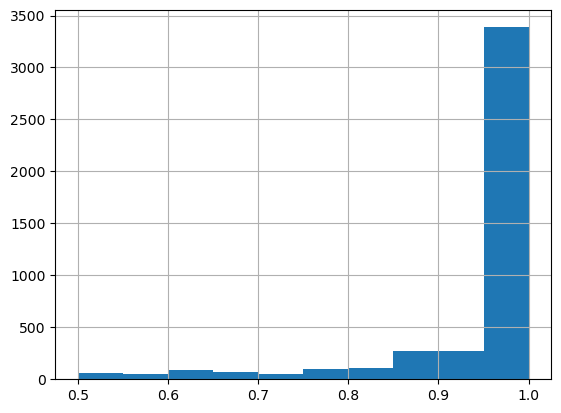

In [76]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

> Q: Can you identify tracks that were misclassfied by the model?
    Does it make sense that the model misclassfied the tracks given the model configuration? Why or why not?

In [77]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rock'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

Empty DataFrame
Columns: [track_name, artist_name, predicted_genre, predicted_genre_prob]
Index: []

In [78]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='R&B'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

Empty DataFrame
Columns: [track_name, artist_name, predicted_genre, predicted_genre_prob]
Index: []